In [1]:
from b_field import structured_field
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.nel.icm import NelICM
from ts_limit.grid import Grid
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

In [2]:
log10MeV = np.loadtxt('../grid_survival_prob/energy_bins.dat')
EGeV = np.power(10, log10MeV - 3.)
EMeV = np.power(10, log10MeV)

3.9269908169872414
0
0
1
0
0
1
0
0
1
0
0
1


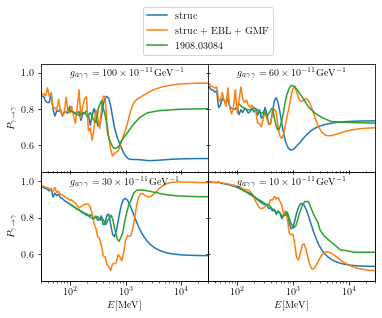

In [10]:
#for c_, rad in enumerate(np.linspace(0, 2*np.pi, num=100)):
m = 2
b = structured_field(8.3, 93, 225)
r = b.r
n_el = NelICM(n0=39., n2=4.05, r_abell=500., r_core=80., r_core2=280., beta=1.2, beta2=0.58, eta=0.)
n_el_vec = n_el.__call__(r)*1e-3
#from gammaALPs.core_copy2 import Source, ALP, ModuleList
#fig, axes = plt.subplots(ncols=1, nrows=4, constrained_layout=True, figsize=(6.24136, 4))
fig = plt.figure()
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0, hspace=0)
axes = []
for i in gs:
    axes.append(fig.add_subplot(i))

#b_angle = b.angle
files = ['gm_1e-9.dat', 'gm_6e-10.dat', 'gm_3e-10.dat', 'gm_1e-10.dat']
for c, g in enumerate([1e2, 6e1, 3e1, 1e1]):

    alp = ALP(m,g)
    source = Source(z = 0.017559, ra = '03h19m48.1s', dec = '+41d30m42s')
    pin = 0.5 * np.diag((1., 1., 0.))
    ml = ModuleList(alp, source, pin=pin, EGeV=EGeV)
    ml.add_propagation("Array", 0, Btrans=b.b_trans, psi=b.angle - np.radians(147), nel=n_el_vec, dL=b.dL_vec)
    #ml.add_propagation("EBL",1, model='dominguez')
    #ml.add_propagation("GMF",1 , model='pshirkov', model_sym='BSS')
    px, py, pa = ml.run()
    psurv = px+py
    axes[c].plot(EMeV, psurv[0], label='struc')

    alp = ALP(m,g)
    source = Source(z = 0.017559, ra = '03h19m48.1s', dec = '+41d30m42s')
    pin = 0.5 * np.diag((1., 1., 0.))
    ml = ModuleList(alp, source, pin=pin, EGeV=EGeV)
    ml.add_propagation("Array", 0, Btrans=b.b_trans, psi=b.angle - np.radians(147), nel=n_el_vec, dL=b.dL_vec)
    #ml.add_propagation("EBL",1, model='dominguez')
    ml.add_propagation("GMF",1, model='pshirkov', model_sym='BSS')
    px, py, pa = ml.run()
    psurv = px+py
    axes[c].plot(EMeV, psurv[0], label='struc + EBL + GMF')
    dat = np.loadtxt(files[c])
    axes[c].plot(np.power(10, dat[:, 0]+3), dat[:, 1], label='1908.03084')
    axes[c].set_xscale('log')
    #axes[c].set_title(f'$g_{{a\gamma\gamma}} = {g:1.0f}\\times 10^{{-11}}\mathrm{{GeV}}^{{-1}}$')
    axes[c].set_xlim((3e1, 3e4))

    axes[c].text(1e2, 0.98, f'$g_{{a\gamma\gamma}} = {g:1.0f}\\times 10^{{-11}}\mathrm{{GeV}}^{{-1}}$')

    if c == 0 or c == 1:
        axes[c].set_xticklabels(())
        axes[c].tick_params(axis='x', which='both', direction='inout')
    else:
        ax = axes[c].twiny()
        ax.set_xlim(axes[c].get_xlim())
        ax.set_xscale('log')
        ax.set_xticklabels(())
        ax.tick_params(axis='x', which='both', direction='inout')
        axes[c].set_xlabel('$E [\SI{}{\mega\electronvolt}]$')


    axes[c].set_yticks((0.6, 0.8, 1.0))
    axes[c].set_ylim(0.45, 1.05)

    if c == 0 or c == 2:
        axes[c].set_ylabel(r'$P_{\gamma\to\gamma}$')

    else:

        axes[c].set_yticklabels(())
        axes[c].tick_params(axis='y', which='both', direction='inout')
axes[0].legend(loc='center', bbox_to_anchor=(1, 1.3))


In [7]:
fig.savefig('corrected_psi_pa.png')

In [ ]:
for i in gs:
    print(i)